In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras

Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
print(x_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [5]:
print(x_test.shape,y_test.shape)

(10000, 32, 32, 3) (10000, 1)


In [8]:
Y_train=np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)
print(Y_train.shape,Y_test.shape)

(50000, 10) (10000, 10)


In [9]:
np.unique(Y_train)

array([0., 1.], dtype=float32)

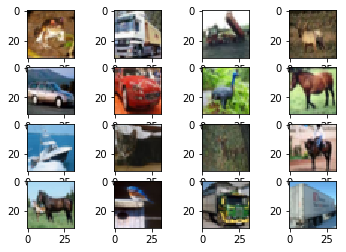

In [10]:
m=4
k=0
plt.figure(1)
for i in range(0,m):
  for j in range(0,m):
    plt.subplot2grid((m,m),(i,j))
    plt.imshow(x_train[k])
    k=k+1
plt.show()


In [0]:
img=x_train[5]

In [0]:
k=np.array([[-1,1,1],
            [1,1,-1],
            [-1,5,1]])

In [0]:
out_r=img.shape[0]-k.shape[0]+1
out_c=img.shape[1]-k.shape[1]+1


In [0]:
new_img=np.zeros((out_r,out_c))

In [0]:

for r in range(out_r):
  for c in range(out_c):
    image_patch=img[r:r+k.shape[0],c:c+k.shape[1]]
    prod=image_patch*k
    prod=prod.sum()
    new_img[r,c]=prod if prod>0 else 0

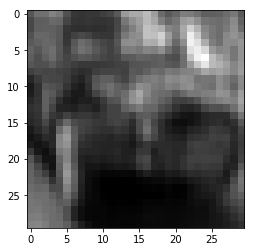

In [16]:
plt.imshow(new_img,cmap='gray')
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Convolution2D,MaxPooling2D,Flatten,Dropout
from keras.utils import np_utils

In [18]:
model=Sequential()
model.add(Convolution2D(40,3,3,input_shape=(32,32,3)))
model.add(Activation('relu'))

model.add(Convolution2D(20,2,2))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(20,2,2))
model.add(Activation('relu'))




model.add(Convolution2D(20,3,3))
model.add(Activation('relu'))

model.add(Convolution2D(20,3,3))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(20,2,2))
model.add(Activation('relu'))

model.add(Convolution2D(20,2,2))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(0.25))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()


W0630 11:48:31.392213 140111940081536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(40, (3, 3), input_shape=(32, 32, 3...)`
  
W0630 11:48:31.428195 140111940081536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0630 11:48:31.436702 140111940081536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 40)        1120      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 40)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 20)        3220      
_________________________________________________________________
activation_2 (Activation)    (None, 29, 29, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 20)        1620      
_________________________________________________________________
activation_3 (Activation)    (None, 13, 13, 20)        0         
__________

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

W0630 11:48:33.212394 140111940081536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0630 11:48:33.244713 140111940081536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [20]:
model.fit(x_train,Y_train,
             batch_size=16,
             nb_epoch=20,
             verbose=2,
             validation_data=(x_test,Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """
W0630 11:48:35.068415 140111940081536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 25s - loss: 2.0428 - acc: 0.2209 - val_loss: 1.7545 - val_acc: 0.3472
Epoch 2/20
 - 18s - loss: 1.6649 - acc: 0.3774 - val_loss: 1.5535 - val_acc: 0.4238
Epoch 3/20
 - 18s - loss: 1.5337 - acc: 0.4348 - val_loss: 1.4483 - val_acc: 0.4706
Epoch 4/20
 - 18s - loss: 1.4541 - acc: 0.4721 - val_loss: 1.3588 - val_acc: 0.5081
Epoch 5/20
 - 18s - loss: 1.3861 - acc: 0.5018 - val_loss: 1.3523 - val_acc: 0.5165
Epoch 6/20
 - 18s - loss: 1.3400 - acc: 0.5205 - val_loss: 1.3330 - val_acc: 0.5187
Epoch 7/20
 - 18s - loss: 1.3026 - acc: 0.5375 - val_loss: 1.2453 - val_acc: 0.5538
Epoch 8/20
 - 18s - loss: 1.2710 - acc: 0.5488 - val_loss: 1.2591 - val_acc: 0.5493
Epoch 9/20
 - 18s - loss: 1.2510 - acc: 0.5539 - val_loss: 1.2334 - val_acc: 0.5591
Epoch 10/20
 - 17s - loss: 1.2225 - acc: 0.5681 - val_loss: 1.2275 - val_acc: 0.5736
Epoch 11/20
 - 17s - loss: 1.2051 - acc: 0.5721 - val_loss: 1.1753 - val_acc: 0.5797
Epoch 12/20
 - 17s - los

In [21]:
model.evaluate(x_test,Y_test)

10000/10000 [==============================] - 1s 82us/step


[1.1198680543899535, 0.6087]

In [22]:
y_test[0].shape

(1,)

deer


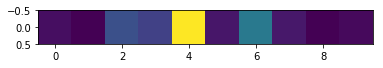

In [69]:
test=np.resize(x_test[26],(1,32,32,3))
img=model.predict(test)
print(class_name[img.argmax()])
plt.imshow(img)
plt.show()

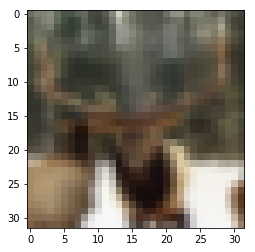

In [70]:
plt.imshow(x_test[26])
plt.show()

In [0]:
class_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}